### Regression Analysis

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import preprocessing

In [2]:
evaluations = ['num of vocab', 'word complexity', 'sentence complexity', 'unique words pct']
evaluation = evaluations[0]

regulator = 'CFPB'
x_factor = 'Proposed Rule'
y_factor = 'Comment'

scale = False

In [3]:
df = pd.read_excel(evaluation + ' ' + regulator + '.xlsx', index_col = 0)

In [4]:
df.replace(0, np.nan, inplace=True)
df.dropna(inplace=True)

In [5]:
df.head()

,Rule,Proposed Rule,Comment
CFPB-2012-0039,2067.0,1489.0,554.000000
CFPB-2012-0037,6692.0,5113.0,789.411538
CFPB-2012-0031,4831.0,4061.5,556.592593
CFPB-2013-0009,1560.0,1409.0,530.400000
CFPB-2014-0024,3371.0,2708.0,732.823529


In [6]:
len(df)

38

In [7]:
x = np.array(df[x_factor])[:,np.newaxis]
y = np.array(df[y_factor])[:,np.newaxis]

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
if scale:
    x = min_max_scaler.fit_transform(x)
    y = min_max_scaler.fit_transform(y)

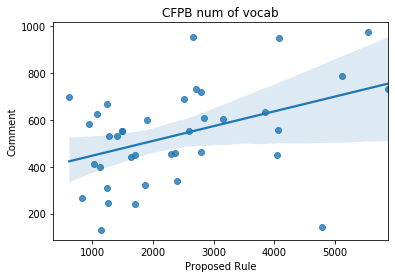

In [9]:
ax = sns.regplot(x=x, y=y)
ax.set_xlabel(x_factor )
ax.set_ylabel(y_factor )
ax.set_title(regulator + ' ' + evaluation)
plt.show()

In [208]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [209]:
r_sq = model.score(x, y)
print('R^2', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

R^2 0.1704481503372285
intercept: [450.24202672]
slope: [[0.09036153]]
